# Stock Market

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime

company_name='GMRINFRA'

def open_data(name):
    return 'Updated_Stock_market_data\\'+name.upper()+'__EQ__NSE__NSE__MINUTE.csv'

dp=pd.read_csv(open_data(company_name))

In [2]:
dp

,timestamp,date,time,quater,open,high,low,close,volume,%change,MA
0,2017-01-02 09:15:00+05:30,2017-01-02,09:15:00,early morning,11.95,11.95,11.90,11.95,45047.0,0.000000,11.950000
1,2017-01-02 09:16:00+05:30,2017-01-02,09:16:00,early morning,11.95,12.00,11.95,12.00,60600.0,0.418410,11.975000
2,2017-01-02 09:17:00+05:30,2017-01-02,09:17:00,early morning,12.00,12.00,11.95,11.95,8365.0,-0.416667,11.966667
3,2017-01-02 09:18:00+05:30,2017-01-02,09:18:00,early morning,11.95,12.00,11.95,11.95,86438.0,0.000000,11.962500
4,2017-01-02 09:19:00+05:30,2017-01-02,09:19:00,early morning,11.95,12.00,11.95,11.95,42662.0,0.000000,11.960000
...,...,...,...,...,...,...,...,...,...,...,...
370540,2021-01-01 15:25:00+05:30,2021-01-01,15:25:00,afternoon,26.60,26.60,26.55,26.55,7932.0,0.000000,18.449000
370541,2021-01-01 15:26:00+05:30,2021-01-01,15:26:00,afternoon,26.55,26.65,26.55,26.60,127784.0,0.188324,18.449022
370542,2021-01-01 15:27:00+05:30,2021-01-01,15:27:00,afternoon,26.60,26.65,26.60,26.65,50378.0,0.187970,18.449044
370543,2021-01-01 15:28:00+05:30,2021-01-01,15:28:00,afternoon,26.65,26.65,26.60,26.60,41461.0,-0.187617,18.449066


In [3]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370545 entries, 0 to 370544
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  370545 non-null  object 
 1   date       370545 non-null  object 
 2   time       370545 non-null  object 
 3   quater     370545 non-null  object 
 4   open       370364 non-null  float64
 5   high       370364 non-null  float64
 6   low        370364 non-null  float64
 7   close      370364 non-null  float64
 8   volume     370364 non-null  float64
 9   %change    370315 non-null  float64
 10  MA         370545 non-null  float64
dtypes: float64(7), object(4)
memory usage: 31.1+ MB


In [4]:
dp['timestamp'] = pd.to_datetime(dp['timestamp'],format='%Y-%m-%d %H:%M:%S%z')
dp['date']=pd.to_datetime(dp['date'])
dp['time'] = pd.to_datetime(dp['time'],format='%H:%M:%S').dt.time
dp['quater']=dp['quater'].astype('string')

In [5]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370545 entries, 0 to 370544
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype                                
---  ------     --------------   -----                                
 0   timestamp  370545 non-null  datetime64[ns, pytz.FixedOffset(330)]
 1   date       370545 non-null  datetime64[ns]                       
 2   time       370545 non-null  object                               
 3   quater     370545 non-null  string                               
 4   open       370364 non-null  float64                              
 5   high       370364 non-null  float64                              
 6   low        370364 non-null  float64                              
 7   close      370364 non-null  float64                              
 8   volume     370364 non-null  float64                              
 9   %change    370315 non-null  float64                              
 10  MA         370545 non-null  floa

In [6]:
dp.describe()

,open,high,low,close,volume,%change,MA
count,370364.000000,370364.000000,370364.000000,370364.000000,3.703640e+05,370315.000000,370545.000000
mean,18.449363,18.478003,18.421717,18.449561,7.046237e+04,0.000515,16.934373
std,3.128215,3.132708,3.126355,3.128086,2.377176e+05,0.247227,1.217381
min,11.850000,11.850000,11.850000,11.850000,0.000000e+00,-9.876543,11.932212
25%,16.200000,16.250000,16.200000,16.200000,2.261000e+03,0.000000,16.782200
50%,17.550000,17.600000,17.550000,17.550000,1.195550e+04,0.000000,17.319312
75%,20.500000,20.550000,20.450000,20.500000,6.155225e+04,0.000000,17.582178
max,29.250000,29.350000,29.150000,29.250000,2.812544e+07,6.292135,18.449088


In [7]:
dp.isnull().sum()

timestamp      0
date           0
time           0
quater         0
open         181
high         181
low          181
close        181
volume       181
%change      230
MA             0
dtype: int64

In [8]:
dp[dp.isna().any(axis=1)]

,timestamp,date,time,quater,open,high,low,close,volume,%change,MA
188032,2019-01-14 13:07:00+05:30,2019-01-14,13:07:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,17.385987
188033,2019-01-14 13:08:00+05:30,2019-01-14,13:08:00,afternoon,16.45,16.5,16.45,16.50,51.0,NaN,17.385983
190983,2019-01-24 12:18:00+05:30,2019-01-24,12:18:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,17.369128
190984,2019-01-24 12:19:00+05:30,2019-01-24,12:19:00,afternoon,16.00,16.0,15.95,15.95,400.0,NaN,17.369121
212009,2019-04-16 12:44:00+05:30,2019-04-16,12:44:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,17.314465
...,...,...,...,...,...,...,...,...,...,...,...
337678,2020-08-27 12:28:00+05:30,2020-08-27,12:28:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,17.850768
337679,2020-08-27 12:29:00+05:30,2020-08-27,12:29:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,17.850768
337680,2020-08-27 12:30:00+05:30,2020-08-27,12:30:00,afternoon,26.25,26.3,26.25,26.25,438057.0,NaN,17.850793
355092,2020-11-02 15:12:00+05:30,2020-11-02,15:12:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,18.131449


In [9]:
#Cleaning NULL of open,close,high,low
for i in dp.index:
    if math.isnan(dp.loc[i,'open']):
        j=i-1
        while(j>0 and math.isnan(dp.loc[j,'open'])==True):
            j-=1
        dp.loc[i,'open']=dp.loc[j,'open']
    if math.isnan(dp.loc[i,'close']):
        j=i-1
        while(j>0 and math.isnan(dp.loc[j,'close'])==True):
            j-=1
        dp.loc[i,'close']=dp.loc[j,'close']
    if math.isnan(dp.loc[i,'high']):
        j=i-1
        while(j>0 and math.isnan(dp.loc[j,'high'])==True):
            j-=1
        dp.loc[i,'high']=dp.loc[j,'high']
    if math.isnan(dp.loc[i,'low']):
        j=i-1
        while(j>0 and math.isnan(dp.loc[j,'low'])==True):
            j-=1
        dp.loc[i,'low']=dp.loc[j,'low']

In [10]:
#Cleaning NULL of volume
dp['volume'].fillna(0,inplace=True)

In [11]:
#Cleaning NULL of %Chnage
#%Change=(curr_close-prev_close)/prev_close*100
#Recalculate change for NULL values
for i in dp.index:
    if math.isnan(dp.loc[i,'%change']):
        dp.loc[i,'%change']=(dp.loc[i,'close']-dp.loc[i-1,'close'])/dp.loc[i-1,'close']*100        

In [12]:
dp.isnull().sum()

timestamp    0
date         0
time         0
quater       0
open         0
high         0
low          0
close        0
volume       0
%change      0
MA           0
dtype: int64

In [13]:
print("Maximum stock price of",company_name,"is",dp['high'].max())
print("Minimum stock price of",company_name,"is",dp['low'].min())
print("Maximum stocks purchased at a time of",company_name,"is",dp['volume'].max())
print("Minimum stocks purchased at a time of",company_name,"is",dp['volume'].min())

Maximum stock price of GMRINFRA is 29.35
Minimum stock price of GMRINFRA is 11.85
Maximum stocks purchased at a time of GMRINFRA is 28125437.0
Minimum stocks purchased at a time of GMRINFRA is 0.0


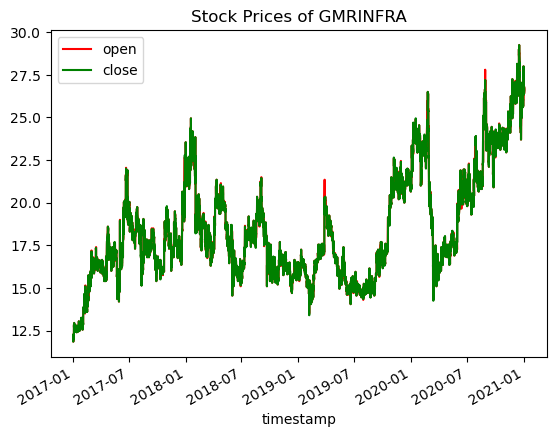

In [14]:
fig, ax = plt.subplots()

dp.plot(x='timestamp',y='open',color='red',ax=ax)
dp.plot(x='timestamp',y='close',color='green',ax=ax)

plt.title('Stock Prices of '+company_name)
plt.show()

In [15]:
def get_date(date):
    return np.datetime64(datetime.strptime(date, "%Y-%m-%d").date())

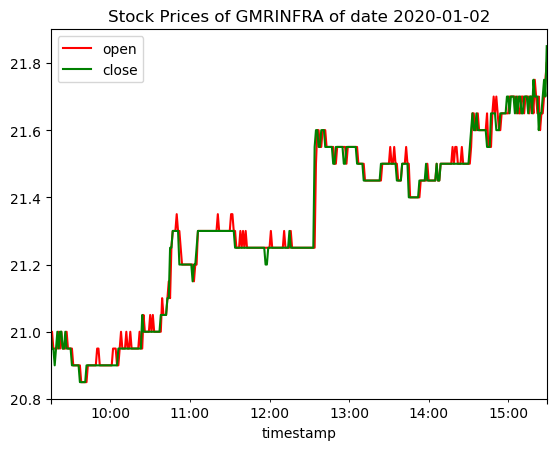

In [16]:
day=get_date('2020-01-02')

dp_day = dp[dp['date'] == day]

fig, ax = plt.subplots()
dp_day.plot(x='timestamp',y='open',color='red',ax=ax)
dp_day.plot(x='timestamp',y='close',color='green',ax=ax)

plt.title('Stock Prices of '+company_name+' of date '+str(day))
plt.show()

In [17]:
# Convert the datetime object to an integer timestamp
dp['int_timestamp'] = dp['timestamp'].apply(lambda x: int(x.timestamp()))

In [18]:
for i in dp.index:
    if dp.loc[i,'%change'] > 0:
        dp.loc[i,'target']=1
    else:
        dp.loc[i,'target']=0

In [19]:
corr = dp.corr(method = 'pearson')
corr

C:\Users\Shivan\AppData\Local\Temp\ipykernel_15376\3384302169.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dp.corr(method = 'pearson')


,open,high,low,close,volume,%change,MA,int_timestamp,target
open,1.000000,0.999940,0.999942,0.999903,0.040536,-0.004974,0.495602,0.551600,-0.000401
high,0.999940,1.000000,0.999931,0.999945,0.043151,0.000764,0.495603,0.551340,0.004923
low,0.999942,0.999931,1.000000,0.999941,0.038292,0.000258,0.495665,0.552026,0.002350
close,0.999903,0.999945,0.999941,1.000000,0.041011,0.006837,0.495685,0.551603,0.008601
volume,0.040536,0.043151,0.038292,0.041011,1.000000,0.041759,-0.014505,-0.076618,0.084176
%change,-0.004974,0.000764,0.000258,0.006837,0.041759,1.000000,-0.001517,-0.000205,0.727980
MA,0.495602,0.495603,0.495665,0.495685,-0.014505,-0.001517,1.000000,0.733986,0.002046
int_timestamp,0.551600,0.551340,0.552026,0.551603,-0.076618,-0.000205,0.733986,1.000000,-0.021022
target,-0.000401,0.004923,0.002350,0.008601,0.084176,0.727980,0.002046,-0.021022,1.000000


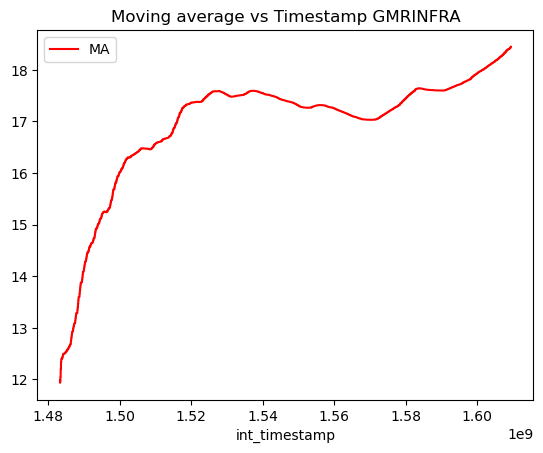

In [20]:
fig, ax = plt.subplots()

dp.plot(x='int_timestamp',y='MA',color='red',ax=ax)

plt.title('Moving average vs Timestamp '+company_name)
plt.show()

In [21]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
X_1=dp[['int_timestamp']]
Y_1=dp['MA']
X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1,Y_1,test_size=0.2, random_state=42)

In [23]:
linear_1=LinearRegression()
linear_1.fit(X_1_train,Y_1_train)

LinearRegression()

In [24]:
X_2=dp[['int_timestamp','MA']]
Y_2=dp['open']
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2,Y_2,test_size=0.2, random_state=42)

In [25]:
linear_2=LinearRegression()
linear_2.fit(X_2_train,Y_2_train)

LinearRegression()

In [26]:
X_3=dp[['int_timestamp','MA','open']]
Y_3=dp['close']
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3,Y_3,test_size=0.2, random_state=42)

In [27]:
linear_3=LinearRegression()
linear_3.fit(X_3_train,Y_3_train)

LinearRegression()

In [28]:
X_4=dp[['int_timestamp','MA','open','close']]
Y_4=dp['high']
X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(X_4,Y_4,test_size=0.2, random_state=42)

In [29]:
linear_4=LinearRegression()
linear_4.fit(X_4_train,Y_4_train)

LinearRegression()

In [30]:
X_5=dp[['int_timestamp','MA','open','close','high']]
Y_5=dp['low']
X_5_train, X_5_test, Y_5_train, Y_5_test = train_test_split(X_5,Y_5,test_size=0.2, random_state=42)

In [31]:
linear_5=LinearRegression()
linear_5.fit(X_5_train,Y_5_train)

LinearRegression()

In [32]:
Y_1_pred = linear_1.predict(X_1_test)
Y_2_pred = linear_2.predict(X_2_test)
Y_3_pred = linear_3.predict(X_3_test)
Y_4_pred = linear_4.predict(X_4_test)
Y_5_pred = linear_5.predict(X_5_test)

In [33]:
Y1_mse=mean_squared_error(Y_1_test,Y_1_pred)
Y2_mse=mean_squared_error(Y_2_test,Y_2_pred)
Y3_mse=mean_squared_error(Y_3_test,Y_3_pred)
Y4_mse=mean_squared_error(Y_4_test,Y_4_pred)
Y5_mse=mean_squared_error(Y_5_test,Y_5_pred)
print("Mean Square Error for MA:",Y1_mse)
print("Mean Square Error for open:",Y2_mse)
print("Mean Square Error for close:",Y3_mse)
print("Mean Square Error for high:",Y4_mse)
print("Mean Square Error for low:",Y5_mse)

Mean Square Error for MA: 0.681561275914831
Mean Square Error for open: 6.670817967219985
Mean Square Error for close: 0.0019042509203748925
Mean Square Error for high: 0.0006570024659466621
Mean Square Error for low: 0.0006728098888524553


In [34]:
specific_date = '2021-07-14'
specific_time = '15:30:00'

In [35]:
#timestamp='2019-05-06 14:01:00+05:30'
timestamp_str=specific_date+' '+specific_time+'+05:30'
timestamp=pd.to_datetime(timestamp_str)
int_timestamp = int(timestamp.timestamp())

In [36]:
test_value = pd.DataFrame({'int_timestamp': [int_timestamp]})
test_value

,int_timestamp
0,1626256800


In [37]:
predicted_ma = linear_1.predict(test_value)
test_value['MA']=predicted_ma
predicted_open = linear_2.predict(test_value)
test_value['open']=predicted_open
predicted_close = linear_3.predict(test_value)
test_value['close']=predicted_close
predicted_high = linear_4.predict(test_value)
test_value['high']=predicted_high
predicted_low = linear_5.predict(test_value)
test_value['low']=predicted_low

# Print the predicted values
print("Predicted Open:", predicted_open)
print("Predicted High:", predicted_high)
print("Predicted Low:", predicted_low)
print("Predicted Close:", predicted_close)

Predicted Open: [22.22102903]
Predicted High: [22.25326726]
Predicted Low: [22.19410753]
Predicted Close: [22.22102357]


In [38]:
df=dp[['int_timestamp']]
predicted_ma = linear_1.predict(dp[['int_timestamp']])
df['MA']=predicted_ma
predicted_open = linear_2.predict(df)
df['open']=predicted_open
predicted_close = linear_3.predict(df)
df['close']=predicted_close
predicted_high = linear_4.predict(df)
df['high']=predicted_high
predicted_low = linear_5.predict(df)
df['low']=predicted_low
df['timestamp']=dp['timestamp']

C:\Users\Shivan\AppData\Local\Temp\ipykernel_15376\2426489568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA']=predicted_ma
C:\Users\Shivan\AppData\Local\Temp\ipykernel_15376\2426489568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open']=predicted_open
C:\Users\Shivan\AppData\Local\Temp\ipykernel_15376\2426489568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [39]:
df

,int_timestamp,MA,open,close,high,low,timestamp
0,1483328700,15.392880,15.468601,15.468849,15.494371,15.440362,2017-01-02 09:15:00+05:30
1,1483328760,15.392881,15.468604,15.468852,15.494374,15.440365,2017-01-02 09:16:00+05:30
2,1483328820,15.392883,15.468607,15.468855,15.494377,15.440368,2017-01-02 09:17:00+05:30
3,1483328880,15.392884,15.468610,15.468858,15.494380,15.440371,2017-01-02 09:18:00+05:30
4,1483328940,15.392886,15.468613,15.468861,15.494382,15.440374,2017-01-02 09:19:00+05:30
...,...,...,...,...,...,...,...
370540,1609494900,18.472847,21.429138,21.429162,21.460617,21.402062,2021-01-01 15:25:00+05:30
370541,1609494960,18.472849,21.429141,21.429165,21.460620,21.402065,2021-01-01 15:26:00+05:30
370542,1609495020,18.472850,21.429143,21.429168,21.460623,21.402067,2021-01-01 15:27:00+05:30
370543,1609495080,18.472852,21.429146,21.429171,21.460626,21.402070,2021-01-01 15:28:00+05:30


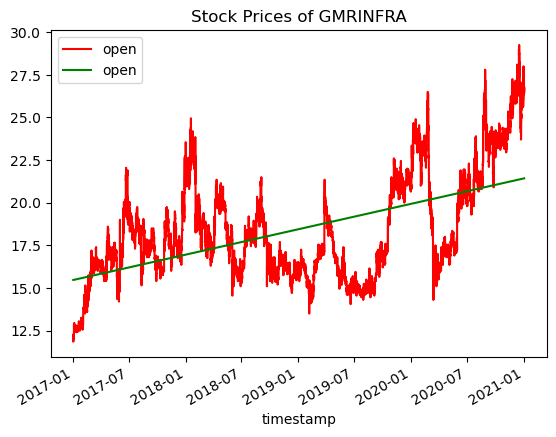

In [40]:
fig, ax = plt.subplots()

dp.plot(x='timestamp',y='open',color='red',ax=ax)
df.plot(x='timestamp',y='open',color='green',ax=ax)

plt.title('Stock Prices of '+company_name)
plt.show()

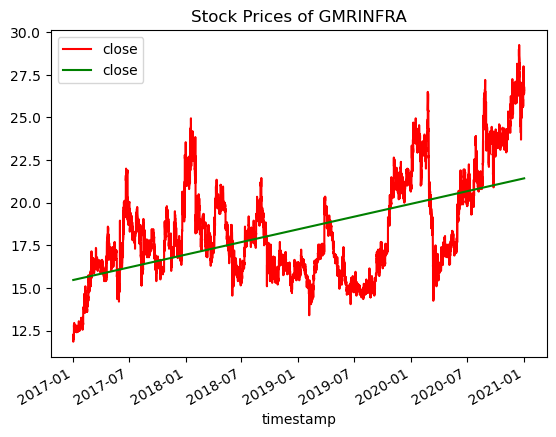

In [41]:
fig, ax = plt.subplots()

dp.plot(x='timestamp',y='close',color='red',ax=ax)
df.plot(x='timestamp',y='close',color='green',ax=ax)

plt.title('Stock Prices of '+company_name)
plt.show()

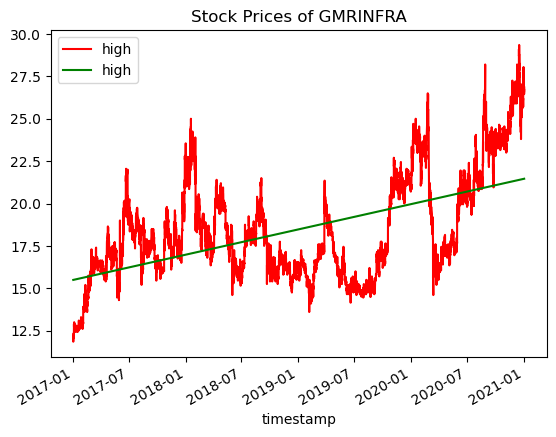

In [42]:
fig, ax = plt.subplots()

dp.plot(x='timestamp',y='high',color='red',ax=ax)
df.plot(x='timestamp',y='high',color='green',ax=ax)

plt.title('Stock Prices of '+company_name)
plt.show()

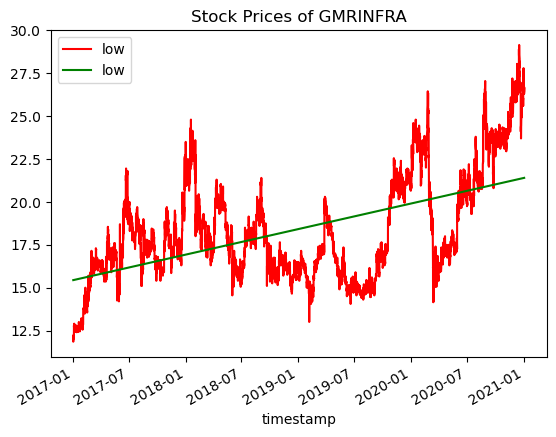

In [43]:
fig, ax = plt.subplots()

dp.plot(x='timestamp',y='low',color='red',ax=ax)
df.plot(x='timestamp',y='low',color='green',ax=ax)

plt.title('Stock Prices of '+company_name)
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
# Should buy or not using logistic regression
X_target=dp[['int_timestamp','MA','open','close','high','low']]
Y_target=dp['target']
X_train,X_test,Y_train,Y_test=train_test_split(X_target,Y_target,test_size=0.2,random_state=42)

In [46]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=16)

In [47]:
specific_date = '2021-07-14'
specific_time = '15:30:00'
#timestamp='2019-05-06 14:01:00+05:30'
timestamp_str=specific_date+' '+specific_time+'+05:30'
timestamp=pd.to_datetime(timestamp_str)
int_timestamp = int(timestamp.timestamp())
test_value = pd.DataFrame({'int_timestamp': [int_timestamp]})
test_value

,int_timestamp
0,1626256800


In [48]:
predicted_ma = linear_1.predict(test_value)
test_value['MA']=predicted_ma
predicted_open = linear_2.predict(test_value)
test_value['open']=predicted_open
predicted_close = linear_3.predict(test_value)
test_value['close']=predicted_close
predicted_high = linear_4.predict(test_value)
test_value['high']=predicted_high
predicted_low = linear_5.predict(test_value)
test_value['low']=predicted_low
predicted_target=logreg.predict(test_value)


# Print the predicted values
print("Predicted Open:", predicted_open)
print("Predicted High:", predicted_high)
print("Predicted Low:", predicted_low)
print("Predicted Close:", predicted_close)
print("Predicted Target:", predicted_target)

Predicted Open: [22.22102903]
Predicted High: [22.25326726]
Predicted Low: [22.19410753]
Predicted Close: [22.22102357]
Predicted Target: [0.]
